# Here is my attempt at a predictive NN

The majority of my time was spent parsing the small dataset Professor Hughes generated into an expanded matrix to feed into the neural network. My approach was largely due to my inexperience with neural networks, so I tried to fit our problem over an existing tutorial found here:

https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

In [1]:
#Import Libraries
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

#Load Dataset
path = "finalInputData.csv"
dataset = np.loadtxt(path, delimiter=",")

#Print first entry in Dataset

#0-31: 4x4 Matrix 
#Values go A11 - Real, A11 - Imaginary, A12 - Real, A12 - Imaginary, ...
print("Matrix: \n" + str(dataset[0][:32]))

#32: Row of GG reduction
print("Matrix Row: \n" + str(dataset[0][32:33]))

#33: Original GG area
print("Original GG area: \n" + str(dataset[0][33:34]))

#34: Reduced GG area
print("Reduced GG area: \n" + str(dataset[0][34:35]))

#35: Binary marker of if selected row is the most optimal reduction
print("Optimal Row: \n" + str(dataset[0][35:36]))

Using Theano backend.


Matrix: 
[ -9.25448038 -15.18775989  -2.24205489  -0.10753784  -0.78882372
   1.36690785  -0.89035393   1.0606634    0.85004528   0.4339224
  -8.66643237  -7.70934722   3.20501255   1.78734733   0.58594616
  -0.32365282   0.21286821   0.69824414  -1.02034206   1.41294532
  -4.83413204  -4.38749276  -0.26543746  -1.2238356   -2.6057605
   0.91744195   0.22359269   0.51810931  -0.31021184   1.67326033
   8.38900837   1.48257171]
Matrix Row: 
[ 0.]
Original GG area: 
[ 272.832]
Reduced GG area: 
[ 99.3888]
Optimal Row: 
[ 0.]


# Implementing The Neural Network - (~5 minute runtime)

Here is where I implemented a simple two layered network. Of 5 different trials each taking about ~5 minutes to complete, the two layered network set up below performed the best with an classification accuracy of ~85.5%. Among some other approaches I tried using different batch sizes (10, 20, and 50), and different amounts of layers (1, 2, and 3). For each test I kept a constant epoch count of 250.

In [5]:
#Create input and output variables 
X = dataset[:,0:35]
Y = dataset[:,35]

#Create Model
model = Sequential()
model.add(Dense(12, input_dim=35, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(X, Y, epochs=250, batch_size=20)

# Evaluate and run the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/250
11984/11984 [==============================] - 0s - loss: 0.7840 - acc: 0.7875     
Epoch 2/250
11984/11984 [==============================] - 0s - loss: 0.3598 - acc: 0.8374     

KeyboardInterrupt: 

# Analyzing The Results

I then created a simple graph to illustrate the progression and accuracy of the model.

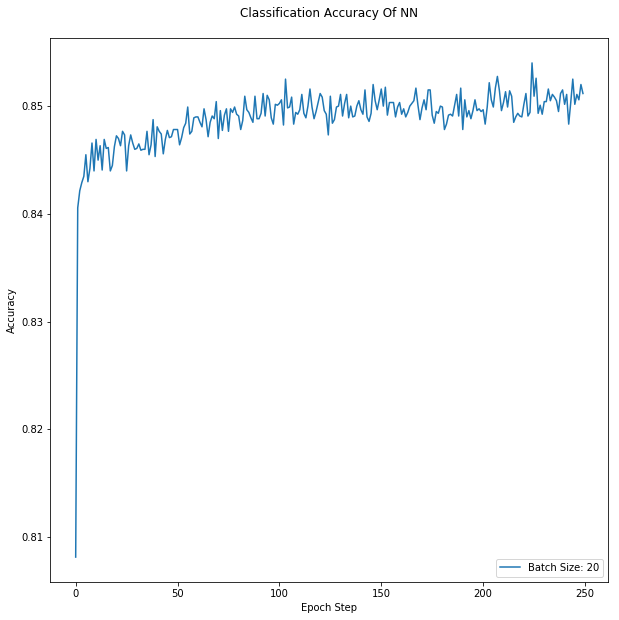

In [18]:
totalAcc = history.history['acc']

plt.figure(figsize=(10,10))
plt.plot(totalAcc, label="Batch Size: 20")
plt.title("Classification Accuracy Of NN\n")
plt.xlabel("Epoch Step")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.show()
